In [7]:
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten,GlobalAveragePooling2D,BatchNormalization,Dropout,Activation
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

ModuleNotFoundError: No module named 'tensorflow.python.keras.preprocessing'

**Context**

I found this dataset when it was not uploaded on Kaggle and was scattered across the internet. This dataset is a collection of multiple data sets I found online. The size of this dataset is ~ 7 GB due to the high resolution of images. The number of images in the dataset is
3355 .jpg files.

**Content**

The dataset has been divided into two groups, train and validation.
Inside the two folders are 4 categories of types:

BrownSpot
Healthy
Hispa
LeafBlast

Note: The image resolution in the images is not uniform.

Possible Datasets that can be used alongside

Rice Leaf Disease Dataset by Marsh

Rice Image Dataset by Huy Minh Do

Plant Pathology2020

**Resources**

UCI - Rice Disease

In [8]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk("C:/Users/swast/Downloads/archive (1)/RiceLeafs/RiceLeafs"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/swast/Downloads/archive (1)/RiceLeafs/RiceLeafs\train\BrownSpot\IMG_20190420_190157.jpg
C:/Users/swast/Downloads/archive (1)/RiceLeafs/RiceLeafs\train\BrownSpot\IMG_20190420_190201.jpg
C:/Users/swast/Downloads/archive (1)/RiceLeafs/RiceLeafs\train\BrownSpot\IMG_20190420_190208.jpg
C:/Users/swast/Downloads/archive (1)/RiceLeafs/RiceLeafs\train\BrownSpot\IMG_20190420_190217.jpg
C:/Users/swast/Downloads/archive (1)/RiceLeafs/RiceLeafs\train\BrownSpot\IMG_20190420_190225.jpg
C:/Users/swast/Downloads/archive (1)/RiceLeafs/RiceLeafs\train\BrownSpot\IMG_20190420_190227.jpg
C:/Users/swast/Downloads/archive (1)/RiceLeafs/RiceLeafs\train\BrownSpot\IMG_20190420_190239.jpg
C:/Users/swast/Downloads/archive (1)/RiceLeafs/RiceLeafs\train\BrownSpot\IMG_20190420_190243.jpg
C:/Users/swast/Downloads/archive (1)/RiceLeafs/RiceLeafs\train\BrownSpot\IMG_20190420_190246.jpg
C:/Users/swast/Downloads/archive (1)/RiceLeafs/RiceLeafs\train\BrownSpot\IMG_20190420_190248.jpg
C:/Users/swast/Downloads/archi

In [9]:
train_dir = "C:/Users/swast/Downloads/archive (1)/RiceLeafs/RiceLeafs/train"
test_dir = "C:/Users/swast/Downloads/archive (1)/RiceLeafs/RiceLeafs/validation"

In [10]:
classes=[]
for file in os.listdir("C:/Users/swast/Downloads/archive (1)/RiceLeafs/RiceLeafs/train"):
    classes+=[file]
print(classes)
print(len(classes))

['BrownSpot', 'Healthy', 'Hispa', 'LeafBlast']
4


In [11]:
brownspot = [train_dir + '/BrownSpot/' + img for img in os.listdir(train_dir + '/BrownSpot')[:9]]
healthy = [train_dir  + '/Healthy/' + img for img in os.listdir(train_dir + '/Healthy')[:9]]
hispa = [train_dir  + '/Hispa/' + img for img in os.listdir(train_dir + '/Hispa')[:9]]
leafblast = [train_dir  + '/LeafBlast/' + img for img in os.listdir(train_dir + '/LeafBlast')[:9]]

**BROWN SPOT LEAFS**

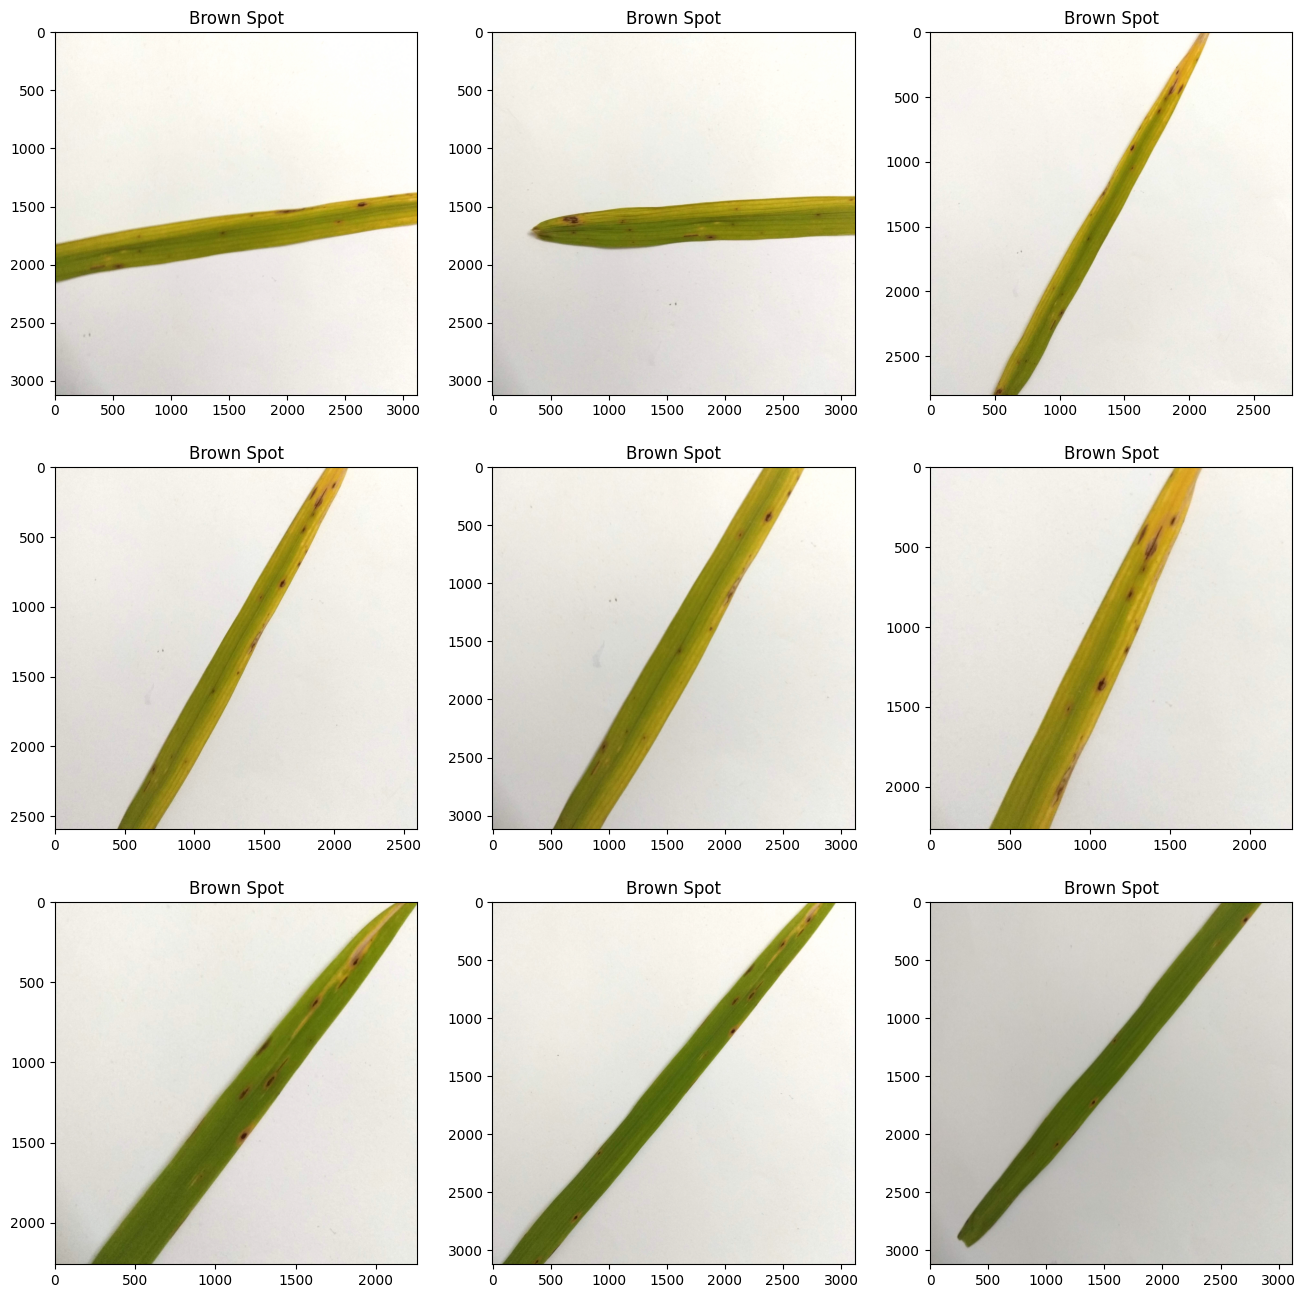

In [12]:
from PIL import Image
plt.figure(figsize=(16,16))
for i,k  in enumerate(brownspot):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Brown Spot")

**HISPA LEAFS**

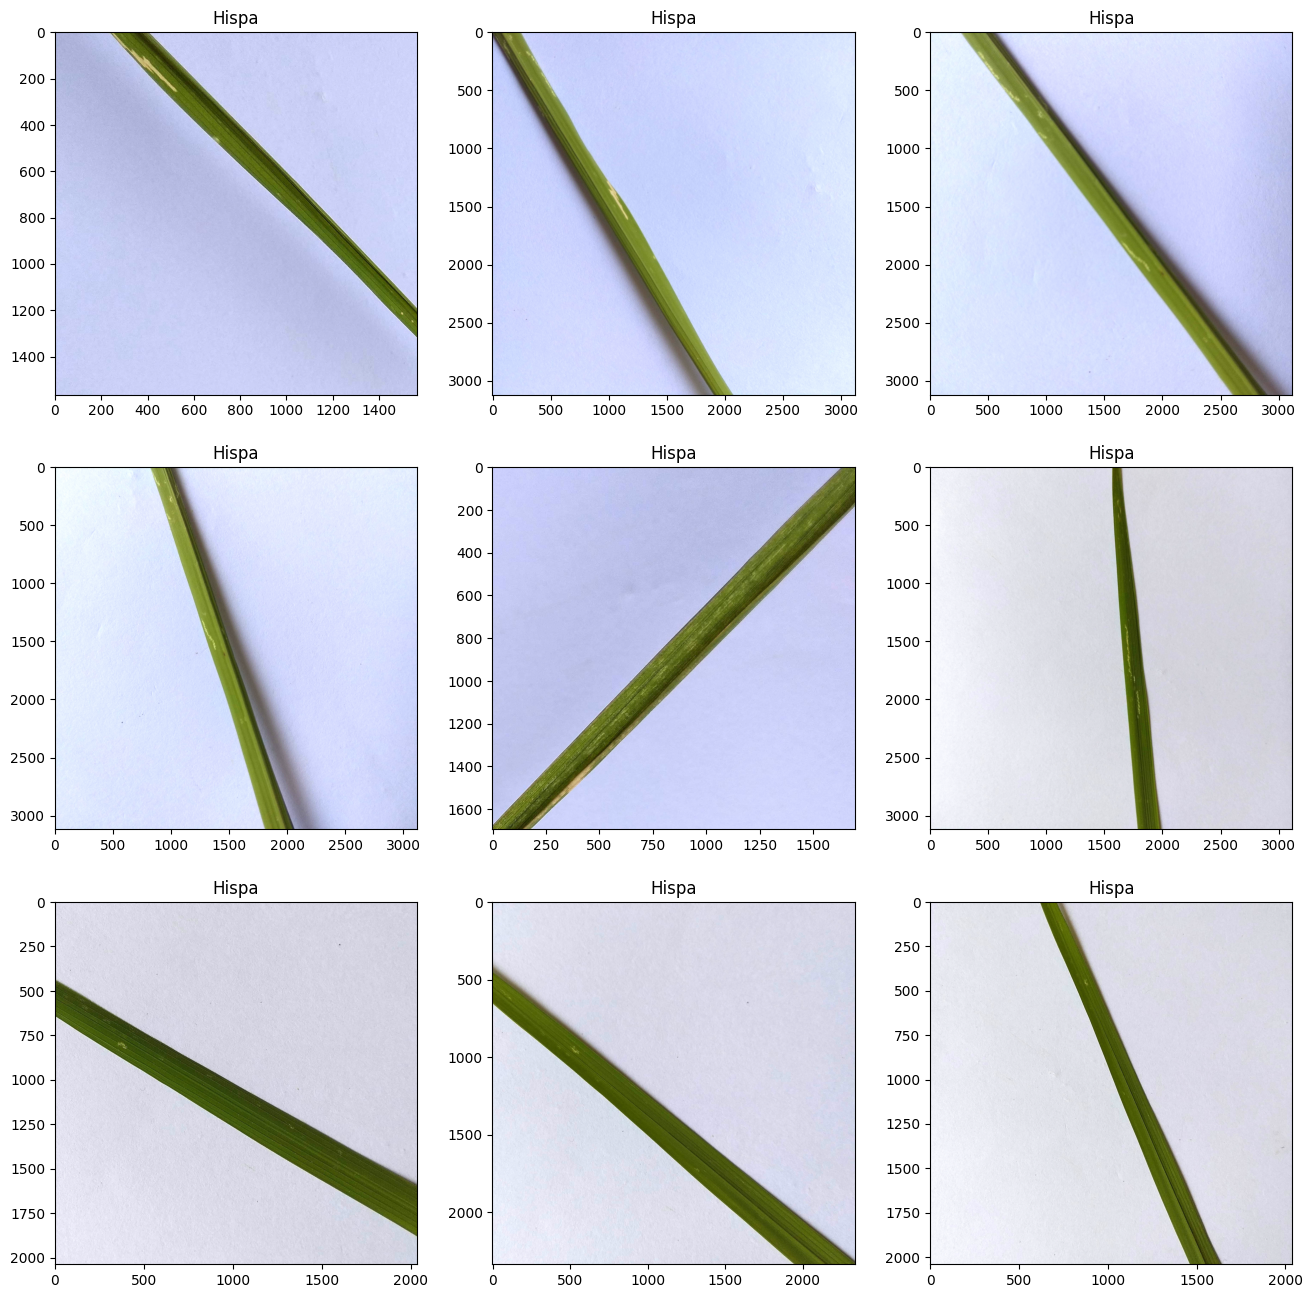

In [13]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(hispa):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Hispa")

**LEAF BLAST LEAF**

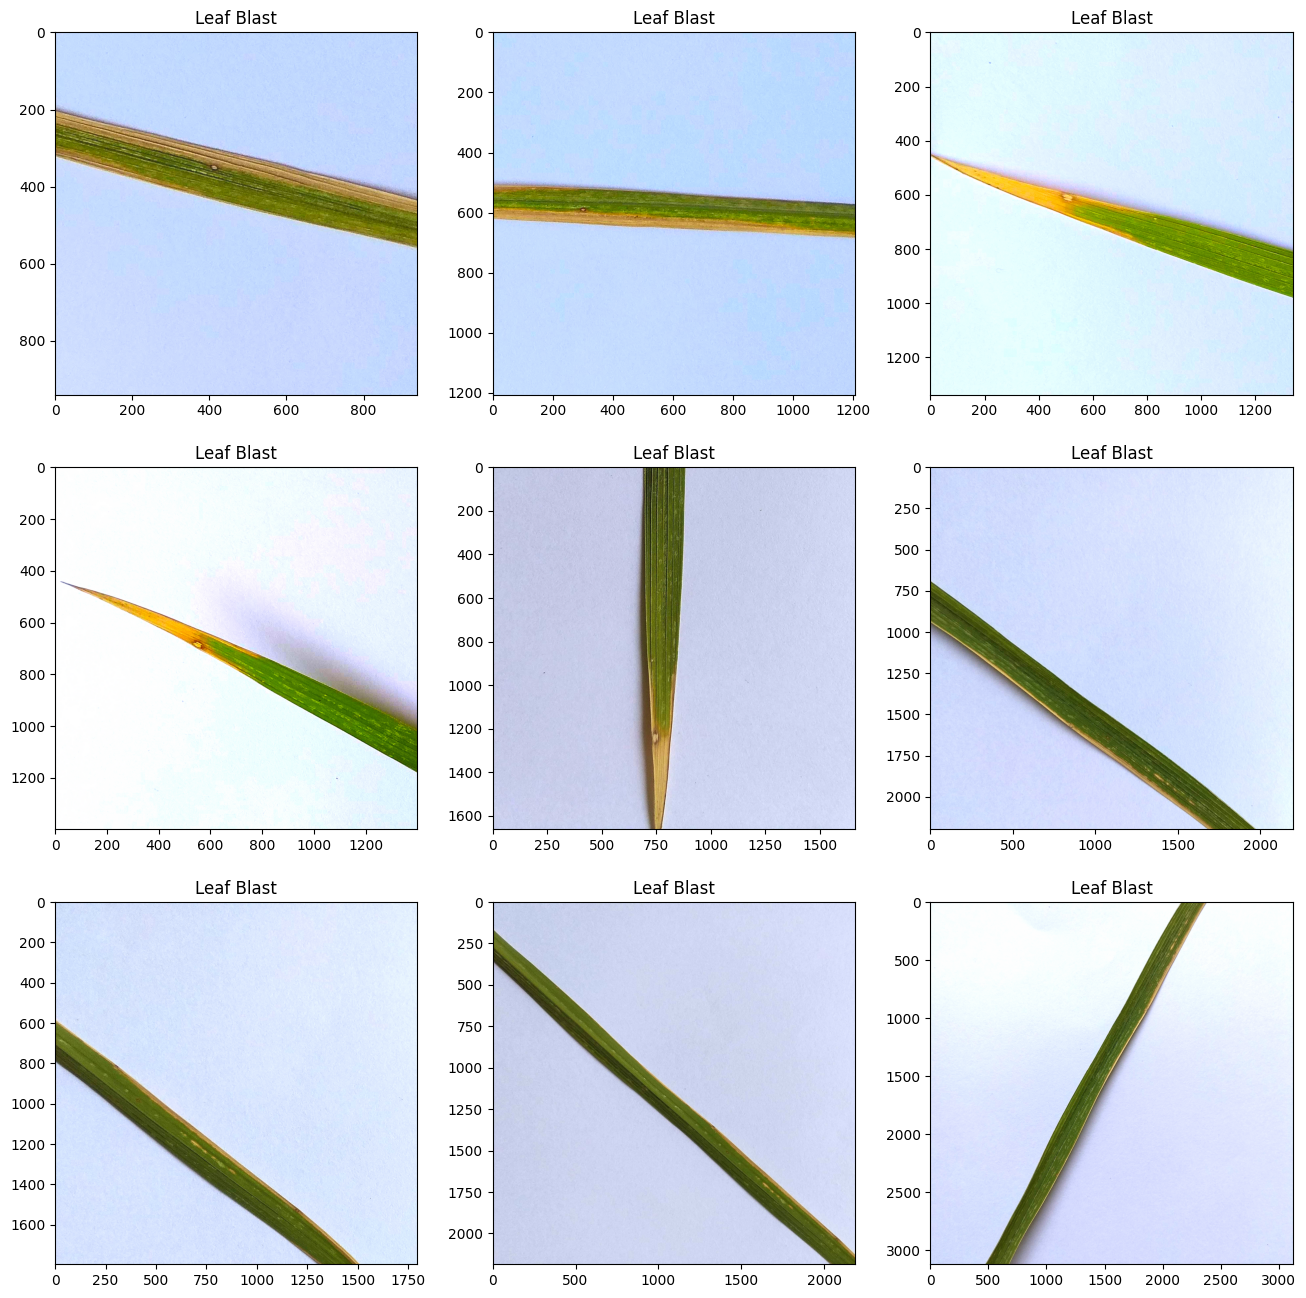

In [14]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(leafblast):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Leaf Blast")

**HEALTHY LEAFS**

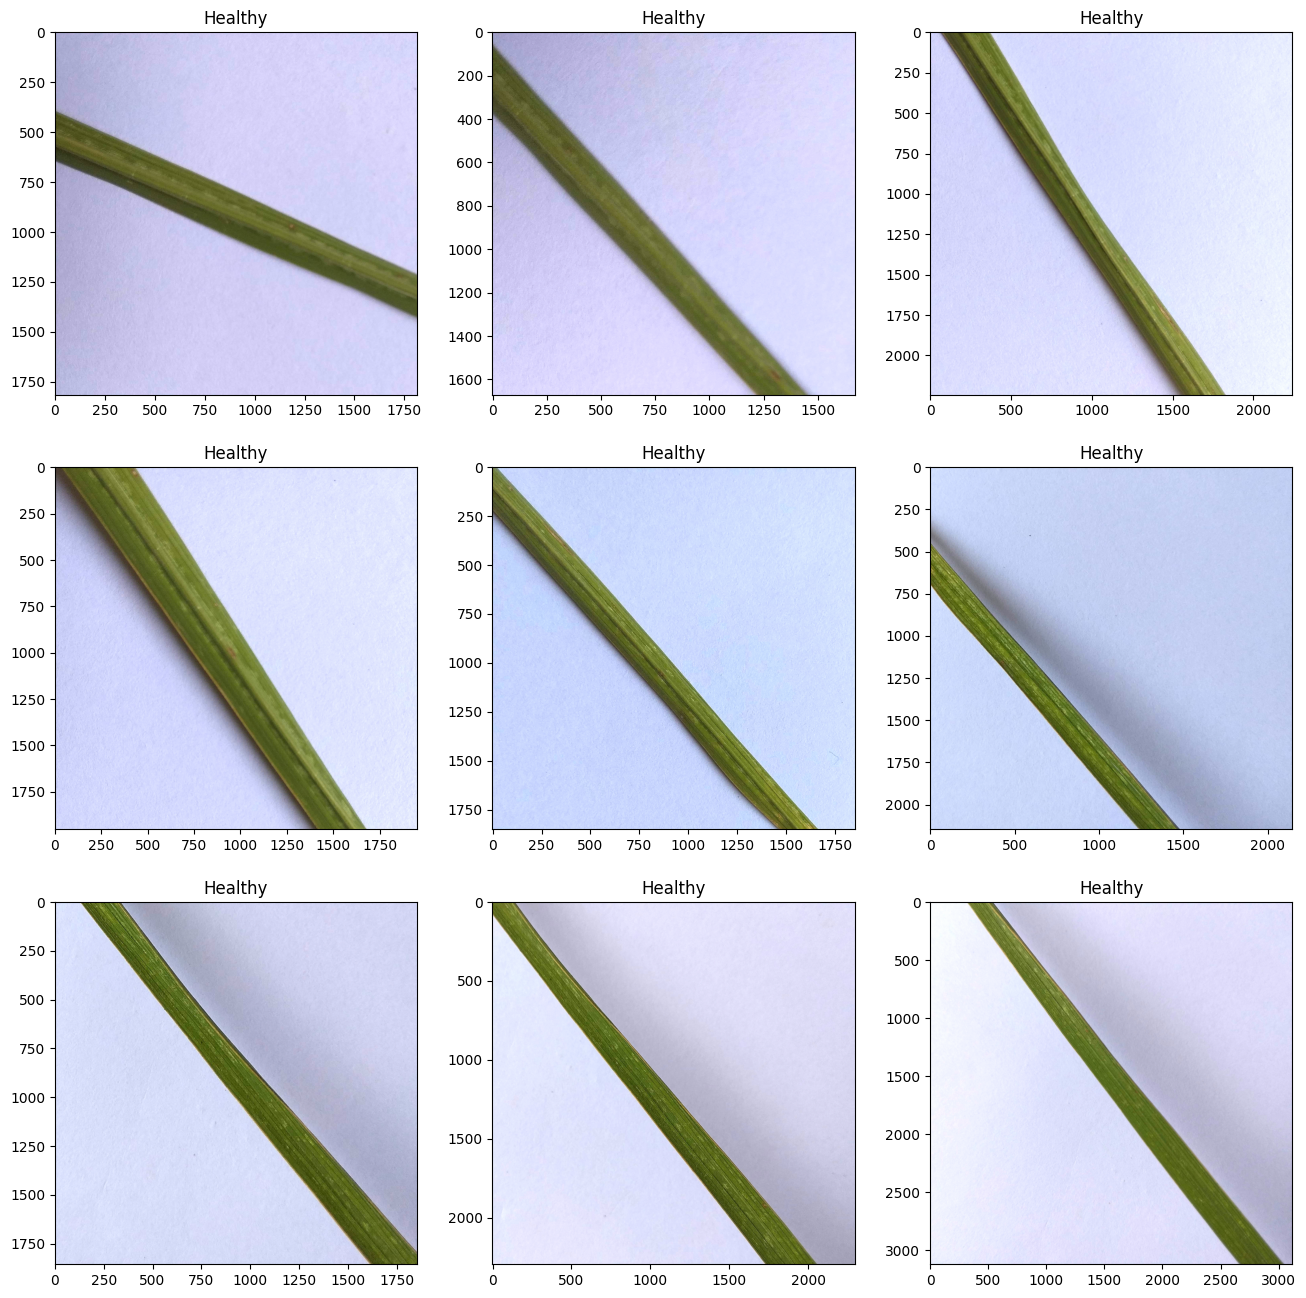

In [15]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(healthy):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Healthy")

**PREPROCESSING THE TRAIN DATASET**

In [16]:
dataset=[]
shape=(224,224)
count=0
for file in os.listdir(train_dir):
    path=os.path.join(train_dir,file)
    t=0
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=shape)
        image=img_to_array(image)
        image=image/255.0
        dataset+=[[image,count]]
        t+=1
    count=count+1

**PREPROCESSING THE TEST DATASET**

In [17]:
testset=[]
count=0
for file in os.listdir(test_dir):
    path=os.path.join(test_dir,file)
    t=0
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=shape)
        image=img_to_array(image)
        image=image/255.0
        testset+=[[image,count]]
        t+=1
    count=count+1

In [18]:
data,trainlabels = zip(*dataset)
test,testlabels = zip(*testset)

In [19]:
labels1=to_categorical(trainlabels)
labels=np.array(labels1)

In [20]:
data=np.array(data)
test=np.array(test)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=42)

In [ ]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(2147, 224, 224, 3)
(537, 224, 224, 3)
(2147, 4)
(537, 4)


**DATA AUGMENTATION**

In [23]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=30,zoom_range=0.2,
                        width_shift_range=0.1,height_shift_range=0.2,shear_range=0.2)

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(4,activation = 'softmax')

],    name = 'Conv_Model')

model.summary()

Model: "Conv_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [25]:
LEARNING_RATE = 0.001 #@param {type:"number"}

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

**FITTING THE MODEL**

In [26]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32)
              ,validation_data=(testx,testy),epochs=10)

Epoch 1/10
68/68 [==============================] - 53s 755ms/step - loss: 1.3023 - accuracy: 0.4224 - val_loss: 1.2084 - val_accuracy: 0.4618
Epoch 2/10
68/68 [==============================] - 48s 701ms/step - loss: 1.2001 - accuracy: 0.4830 - val_loss: 1.0791 - val_accuracy: 0.5196
Epoch 3/10
68/68 [==============================] - 47s 692ms/step - loss: 1.0626 - accuracy: 0.5580 - val_loss: 0.9825 - val_accuracy: 0.6071
Epoch 4/10
68/68 [==============================] - 45s 658ms/step - loss: 1.0454 - accuracy: 0.5850 - val_loss: 0.9502 - val_accuracy: 0.5940
Epoch 5/10
68/68 [==============================] - 47s 694ms/step - loss: 1.0267 - accuracy: 0.5873 - val_loss: 0.9274 - val_accuracy: 0.6127
Epoch 6/10
68/68 [==============================] - 47s 694ms/step - loss: 1.0416 - accuracy: 0.5654 - val_loss: 0.9364 - val_accuracy: 0.6369
Epoch 7/10
68/68 [==============================] - 42s 612ms/step - loss: 1.0128 - accuracy: 0.5864 - val_loss: 1.0094 - val_accuracy: 0.5866

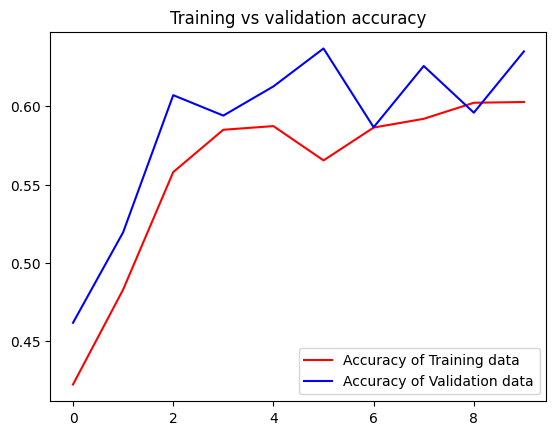

<Figure size 640x480 with 0 Axes>

In [27]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

**Inference :- We can use pretrained model here to further improve the accuracy and loss.**

In [28]:
# After trining Pop the Output Layer and Drop out layer
model.pop()
model.pop()
model.pop()
model.pop()

model.summary()

Model: "Conv_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [29]:
features=model.predict(trainx)

68/68 [==============================] - 12s 168ms/step


In [30]:
X_train = features
X_train.shape

(2147, 128)

In [31]:
Y_train = trainy
Y_train.shape

(2147, 4)

In [32]:
Y_train

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [33]:
class_labels = np.argmax(Y_train, axis=1)
Y_train = class_labels

In [34]:
# Imoplementing XG Boost

import xgboost as xgb
xgb_model = xgb.XGBClassifier()

xgb_model.fit(X_train, Y_train) 


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [35]:
X_test = model.predict(testx)

17/17 [==============================] - 3s 146ms/step


In [36]:
X_test.shape

(537, 128)

In [37]:
class_labels = np.argmax(testy, axis=1)
Y_test = class_labels
Y_test.shape

(537,)

In [38]:
import sklearn.metrics as metrics


In [39]:
prediction_xgb = xgb_model.predict(X_test)
print ("Accuracy = ", metrics.accuracy_score(Y_test, prediction_xgb))

Accuracy =  0.5828677839851024


In [40]:
import sys
!{sys.executable} -m pip install lightgbm

In [41]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=Y_train)

lgbm_params = {'learning_rate':0.05, 'boosting_type':'dart',
              'objective':'multiclass',
              'metric': 'multi_logloss',
              'num_leaves':100,
              'max_depth':10,
              'num_class':4}  #no.of unique values in the target class not inclusive of the end value

lgb_model = lgb.train(lgbm_params, d_train, 50) 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7006
[LightGBM] [Info] Number of data points in the train set: 2147, number of used features: 40
[LightGBM] [Info] Start training from score -1.851744
[LightGBM] [Info] Start training from score -0.822761
[LightGBM] [Info] Start training from score -1.794091
[LightGBM] [Info] Start training from score -1.437416
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [42]:
prediction_lgb=lgb_model.predict(X_test)
#print ("Accuracy with LGBM = ", metrics.accuracy_score(Y_test, prediction_lgb))

In [43]:
prediction_lgbm = np.array([np.argmax(i) for i in prediction_lgb])
print ("Accuracy with LGBM = ", metrics.accuracy_score(Y_test, prediction_lgbm))

Accuracy with LGBM =  0.6238361266294227
